In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
video_games_raw = pd.read_csv('vgsales.csv', parse_dates=['Year'])
video_games_raw.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [152]:
video_games_raw['NA_Sales'].quantile(0.95)

1.06

In [131]:
video_games_raw['EU_Sales'].quantile(0.95)

0.63

In [153]:
video_games = video_games_raw[video_games_raw['NA_Sales'] < 1.06]

In [154]:
video_games = video_games_raw[video_games_raw['EU_Sales'] < 0.63]

In [155]:
video_games.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15763.000000,15763.000000,15763.000000,15763.000000,15763.000000,15763.000000
mean,8706.667449,0.173550,0.072323,0.059607,0.028465,0.334243
std,4569.964161,0.315165,0.119245,0.198967,0.127476,0.514753
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4777.500000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8718.000000,0.070000,0.020000,0.000000,0.010000,0.150000
75%,12658.500000,0.200000,0.090000,0.030000,0.030000,0.410000
max,16600.000000,9.430000,0.620000,4.870000,10.570000,20.810000


1 Choose two Continuous Variables (NA_Sales & EU_Sales) and plot them three different ways

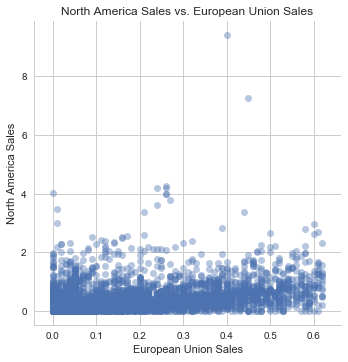

In [156]:
#PLOT 1
g = sns.lmplot(y='NA_Sales', # Variable 1.
               x='EU_Sales', # Variable 2.
               data=video_games, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("North America Sales")
g.set_xlabels("European Union Sales")
plt.title('North America Sales vs. European Union Sales')
plt.show()

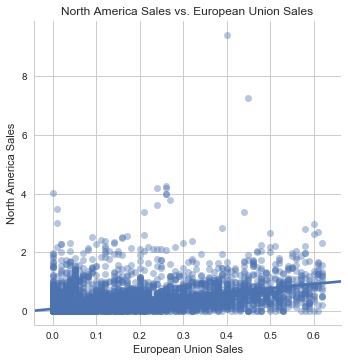

In [157]:
#PLOT 2
g = sns.lmplot(y='NA_Sales', # Variable 1.
               x='EU_Sales', # Variable 2.
               data=video_games, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("North America Sales")
g.set_xlabels("European Union Sales")
plt.title('North America Sales vs. European Union Sales')
plt.show()

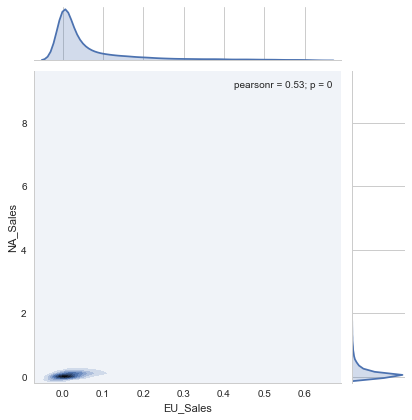

In [146]:
#PLOT 3
g = sns.jointplot(x="EU_Sales", y="NA_Sales", data=video_games, kind="kde")
plt.show()

2 Choose one Variable (NA_Sales) and plot it four different ways

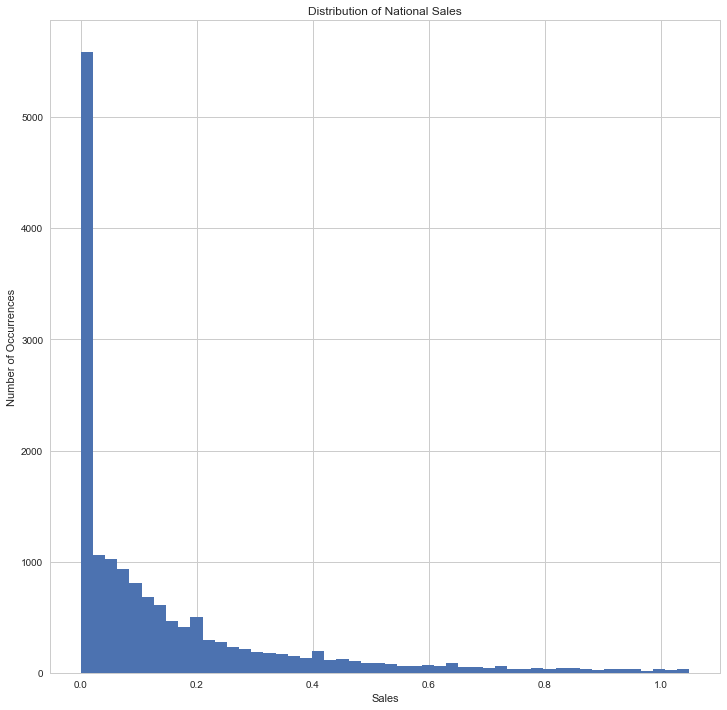

In [123]:
#PLOT 1
plt.figure(figsize=[12,12])
plt.hist(video_games['NA_Sales'], bins=50)
# plt.yticks(np.arange(0, 17000, 250), rotation='horizontal')
plt.title('Distribution of National Sales')
plt.xlabel('Sales')
plt.ylabel('Number of Occurrences')
plt.show()

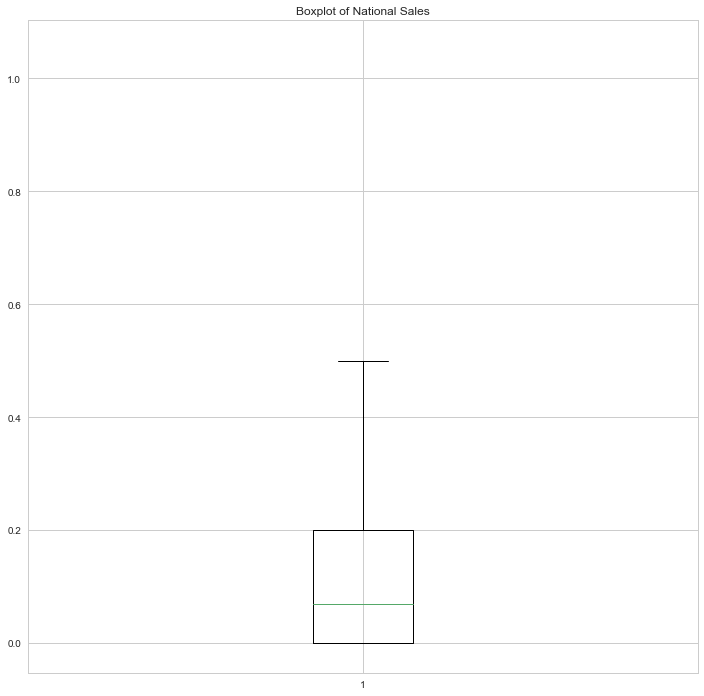

In [128]:
#PLOT 2
plt.figure(figsize=[12,12])
plt.boxplot(video_games['NA_Sales'])
plt.title('Boxplot of National Sales')
plt.show()

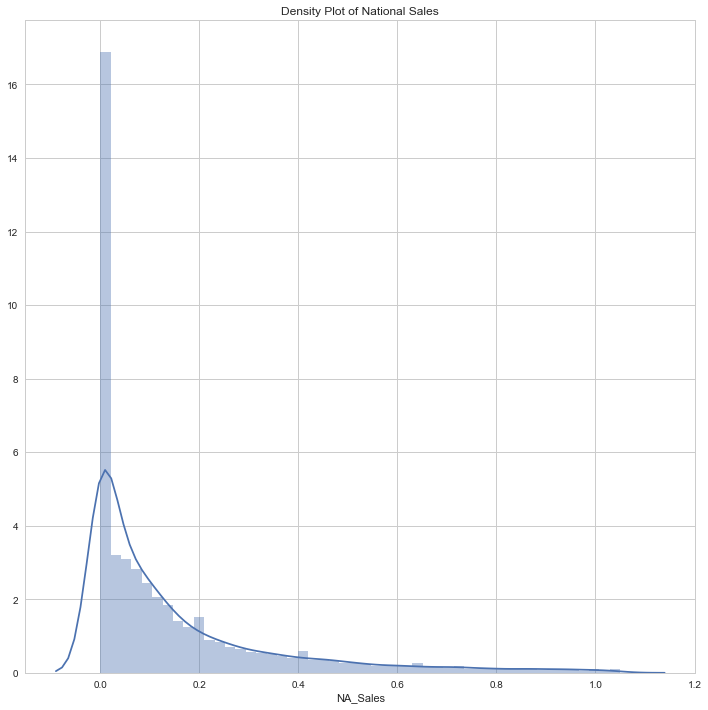

In [129]:
#PLOT 3
plt.figure(figsize=[12,12])
sns.distplot(video_games['NA_Sales'])
plt.title('Density Plot of National Sales')
plt.show()

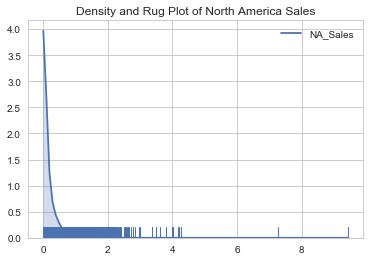

In [161]:
#PLOT 4
sns.kdeplot(video_games['NA_Sales'], shade=True, cut=0)
sns.rugplot(video_games['NA_Sales'])
plt.title('Density and Rug Plot of North America Sales')
plt.show()

3 Choose one Continuous (EU_Sales) and one Categorical (Genre) and plot 6 different ways

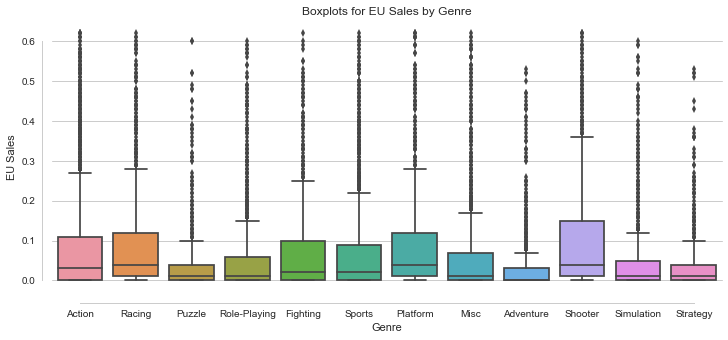

In [170]:
#PLOT 1
# Comparing groups using boxplots.
plt.figure(figsize=[12,5])
ax = sns.boxplot(x='Genre',y='EU_Sales', data=video_games)  
plt.title('Boxplots for EU Sales by Genre')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Genre', ylabel='EU Sales')
plt.show()


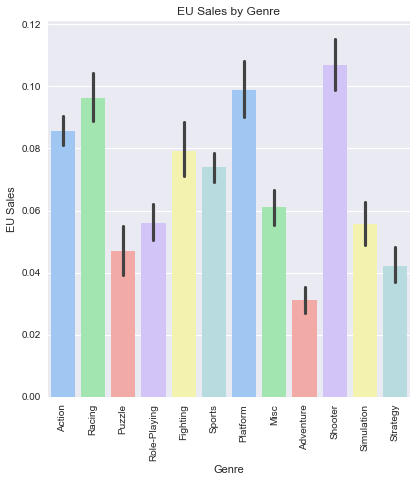

In [164]:
#PLOT 2
# Setting the overall aesthetic.
sns.set(style="darkgrid")
g = sns.factorplot(x="Genre", y="EU_Sales", data=video_games,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("EU Sales")
g.set_xlabels("Genre")
plt.title('EU Sales by Genre')
plt.xticks(rotation='vertical')
plt.show()

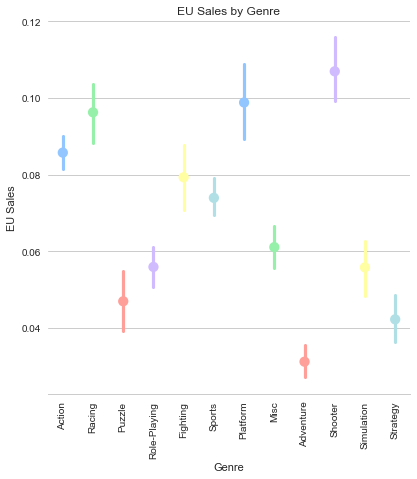

In [165]:
#PLOT 3
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.factorplot(x="Genre", y="EU_Sales", data=video_games,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("EU Sales")
g.set_xlabels("Genre")
plt.xticks(rotation='vertical')
plt.title('EU Sales by Genre')
plt.show()

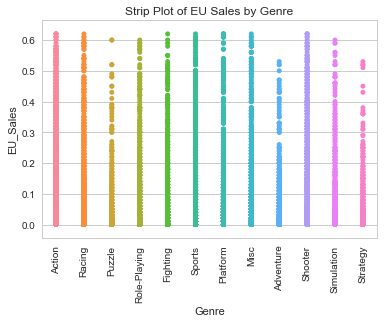

In [172]:
#PLOT 4
sns.stripplot(x="Genre", y="EU_Sales", data=video_games)
plt.xticks(rotation='vertical')
plt.title('Strip Plot of EU Sales by Genre')
plt.show()

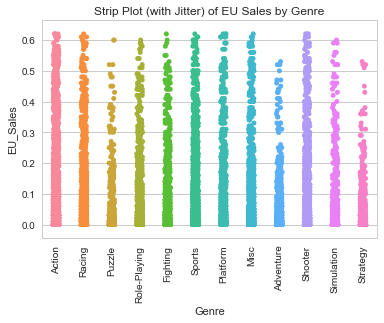

In [173]:
#PLOT 5
sns.stripplot(x="Genre", y="EU_Sales", data=video_games, jitter=True)
plt.xticks(rotation='vertical')
plt.title('Strip Plot (with Jitter) of EU Sales by Genre')
plt.show()

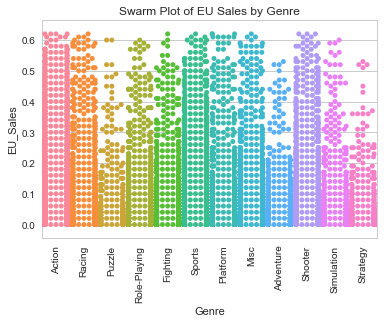

In [174]:
#PLOT 6
sns.swarmplot(x="Genre", y="EU_Sales", data=video_games)
plt.xticks(rotation='vertical')
plt.title('Swarm Plot of EU Sales by Genre')
plt.show()